<a href="https://colab.research.google.com/github/WolferkGIT/Deep-Learning/blob/main/FCN_classifier_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install datasets wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=308ac451d9e93512f48ec54cd82390359e334148cdaca7a55a126aafc7d15ac0
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8

# Training a neural text classifier in PyTorch

In this homework you task is to make fully-connected neural network text classifier. You will use the IMDB dataset that we used in one of the previous homeworks. The goal is to understand how to use PyTorch to build simple neural networks, how to train them, and how to tune your hyperparameters and architecture. You will also learn how to use [WandB](https://wandb.ai) to track your experiments.

## Here's a summary of what you will do:
1. Load the IMDB dataset (lookup the previous homeworks)
2. Split the train set into train and validation sets. You can use `sklearn.model_selection.train_test_split` for this. Use 10% of the train set as the validation set.
3. Pre-process the data using sklearn's CountVectorizer or TfidfVectorizer (lookup the previous homeworks). You will need to convert the data from a sparse matrix to a dense matrix. You can do this using the `.toarray()` method.
4. Make a neural network classifier using `torch.nn`. In more details:
   1. Use **PyTorch subclassing API** to define your model. The model should receive a batch of the pre-processed data as the input tensor and output the class logits.
   2. Use layers from `nn` module to define the model. You can use `nn.Linear`, `nn.ReLU`, `nn.Dropout`, `nn.BatchNorm1d`, etc. You can also use `nn.Sequential` to combine layers into a single module.
   3. Add a parameter `use_batch_norm` to the `__init__` method of your model. If this flag is provided add a `nn.BatchNorm1d` layer after each `nn.Linear` layer except the last one.
   4. Experiment with different architectures. Try using different number of layers, different number of neurons in each layer, different activation functions, different dropout rates, etc. There is no wrong way to make the archtecture as long as it works well. However, make sure your final model is sane. Feel free to make multiple classes for different architectures.
5. Implement a simple training loop
   1. Initialize your model and the optimizer in the beginning of the training loop. Log all of your hyperparaemers to WandB.
   2. Place your model to GPU (`model.to("cuda")`)
   3. Use `torch.optim` to define the optimizer.
   4. It has to support: GPU training, multiple epoch training, batching, logging training loss and accuracy to WandB, computing the validation accuracy every `EVAL_EVERY` steps and reporting it to WandB.
   5. In the end of training, evaluate the model on the validation set, print the final validation accuracy and report it to WandB.
   6. Optionally implement gradient accumulaiton, learning rate scheduling, early stopping, etc.
6. Run the training loop multiple times with different hyperparameters. Log all of your experiments to WandB. Compare the results and report the best hyperparameters to WandB. We expect you to train at least 50 different models (not all of them have to be different architectures, you can also change the number of epochs, learning rate, batch size, etc.). Use your time wisely, look at WandB while the model is training, and stop training it it doesn't worth it. After finding the optimal hyperparameters, evaluate this model on the test set.
7. Implement the inference code. It should take a string as input, pre-process it, and output the predicted class. You can use the `torch.argmax` function to get the class index from the logits. You can also use the `torch.nn.functional.softmax` function to get the class probabilities. After training, interact with your model and show that it works. Find where it fails and try to understand why.
8. Make a short report (PDF, 1-2 pages). It should contain:
   1. The best model architecture and hyperparameters. E.g., "I used 3 layers with 512 neurons each, ReLU activation, BatchNorm, 0.5 dropout, and Adam optimizer with learning rate 0.001"
   2. The final best validation and corresponding test accuracy
   3. **What you learned from tuning hyperparameters**, which ones are more important, any practical tips on how to tune them, etc. Be detailed. This should be the biggest part of the report by far. Include WandB plots to support your claims.
   4. A few examples of the model's predictions
   5. A few examples of the model's failures


## Tips:
- Make sure to select GPU runtime in Colab
- `torch.nn` tutorial: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
- PyTorch subclassing API means that you define your model as a class that inherits from `nn.Module`. You can define the model's layers in the `__init__` method and the forward pass in the `forward` method. You can also define other methods to make your life easier.
- Try using different optimizers, learning rates, batch sizes, etc.
- Learning rate scheduling: https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  - We recommend to use `lr_scheduler.LambdaLR` as it allows you to define the learning rate scheduler by yourself.
- Use a relatively large `EVAL_EVERY` value (e.g. 1K-10K) to speed up the training. You don't want to wait for the test accuracy to be computed every 100 steps. But also evaluate frequently enough to see the progress.
- You can use the `wandb sweep` tool to automate the hyperparameter search.
- Every time you log metrics to wandb, provide it `step` argument to make sure the metrics are plotted correctly. It can do it automatically, but sometimes it doesn't work. You can use the `global_step` variable for this.
- Note that some layers in `torch.nn` behave differently during training and inference. For example, `nn.Dropout` and `nn.BatchNorm1d` behave differently during training and inference. You can use the `model.train()` and `model.eval()` methods to switch between training and inference modes. You can also use the `torch.no_grad()` context manager to disable gradient calculation for a block of code.
- Use a ridiculously large batch size to cause a CUDA memory error. This will teach you what it looks like and how to fix it. You can also use the `torch.cuda.empty_cache()` function to free the memory.
- Notice that we are tuning our hyperparameters on the validation set, but we are reporting the final test accuracy. In practice, you should use the test set only once, so you do not overfit your hyperparameters to it.

## WandB:
Weights & Biases (WandB) is a tool for tracking machine learning experiments. It's very easy to use and free.
Unlike matplotlib it makes your plots interactive and allows you to compare different runs. It also allows you to log arbitrary data, not just plots. You can log your model's hyperparameters, the code, the dataset, etc. It's a great tool for keeping track of your experiments.
Unlike tensorboard it logs your data in the cloud and allows you to access it from anywhere.
It has a lot of cool features, but all you need for this homework is to log your training loss, training accuracy, test accuracy, and model hyperparameters.

You just need to install the `wandb` package, call `wandb.init()` and then log your metrics using `wandb.log()`. Here's a quickstart guide:

- Wandb tutorial: https://wandb.ai/quickstart
- Name your project `hw4_nn_text_classifier` and log all of your experiments there.

## Grading:
- 3 points for the model
- 3 points for the training loop
- 1 point for experiments
- 1 point for final validation accuracy > 91%
- 1 point for inference code
- 1 points for the report

**Extra points:**
- 1 point for implementing Triangular Learning Rate scheduling (please log learning rate to WandB)
- 1 point for implementing gradient accumulation
- 2 points for implementing early stopping (you have to load the best model weights in the end)
- 1 point for extensive hyperparameter search (reasonable search space, at least 100 different models)
- 1 point for cool visualizations. Feel free to use either matplotlib or WandB.

**Potential mistakes:**
- -1 point for each error in data pre-processing. -2 for blatant mistakes.
- -10 (ten) points for not using the PyTorch subclassing API
- -1 for not using `torch.optim`
- -1 for not using test mode of dropout and batch norm during both validation and test
- -1 points for not using WandB
- -1 point for not logging the hyperparameters to WandB
- -1 for not following the code style
- -10 (ten) points if your notebook doesn't run top-to-bottom

In [2]:
import random
import torch
import torch.nn
import torch.nn.functional as F
import torch.optim
import datasets
import wandb
import numpy
import itertools
import pandas

In [3]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
%env WANDB_ENTITY=Anton_Kovalev/textmachinelab
%env WANDB_PROJECT=FCN CLassifier

env: WANDB_ENTITY=Anton_Kovalev/textmachinelab
env: WANDB_PROJECT=FCN CLassifier


In [5]:
## Loading the dataset from huuginface.com
from datasets import load_dataset
IMDB_raw = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
#Since the huggingface tools pre-split the dataset for me I want to know what's inside
IMDB_raw

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Okay, the dataset is loaded. It has already been split into 3 parts.
Let's strip 10% of train and 10%

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42) <- example from sklearn
print(IMDB_raw['train'][1])
#Let's find out how many labels are there
print(IMDB_raw['train'][:100]['label'])

{'text': '"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, 

At this point first 100 labels are zeroes. I am confused. Let's find the distribution of labels in our data

In [ ]:
counts=[0]*10
for a in IMDB_raw['train']:
    #print(int(a['label']))
    counts[int(a['label'])] += 1
print(counts)

[12500, 12500, 0, 0, 0, 0, 0, 0, 0, 0]


Okay, those are only values "0" and "1" there and they have 50/50 distribution. I assume "one" to be a positive sentiment and zero is a negative one

In [17]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( IMDB_raw['train']['text'], IMDB_raw['train']['label'], test_size=0.10, random_state=42)
print(X_train_1[:10])
print(len(X_train_1),len(y_train_1),len(X_test_1),len(y_test_1))
print(y_train_1[:10])
#print(y_train.shape)

['I was p***ed when I couldn\'t see this one when it was screening at the Philly Film Fest last year, so when I saw that it was going to be on cable tonight, I put it on remind as soon as I could. So was it worth the wait? Well let\'s backtrack a tad as I have yet to give you the plot. Sean Crawley is a young man who doesn\'t know what his path in life is. Enter Duke (George Wendt) who introduces him to his boss Ray (Danny Baldwin). One night Ray totally hammered asks Sean to off the guy that they had Sean following around. And it goes on from there. Which leads me back to the question posed. Was it worth the wait? Yes and no, the buildup was pretty good and George Wendt stole the movie for me. He just took the ball and ran with it. But it\'s nowhere near as violent as I was led to believe and somewhere along the movies running time the ball is not only dropped, but fumbled and taken in the other direction. I know where this point happened exactly, but can\'t say without spoiling the f

In [18]:
##Here I decide to redistribute the size ratios of test. Let's leave 5% for test, 5% for val 90% for train
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split( IMDB_raw['test']['text'], IMDB_raw['test']['label'], test_size=0.10, random_state=40)
X_train = X_train_1 + X_train_2
X_test = X_test_1
X_val = X_test_2
y_train = y_train_1 + y_train_2
y_test = y_test_1
y_val = y_test_2
#that might shoot me in the leg later, since test and validation are coming from two different parts of the dataset
#yet I hope to get lucky
print(len(X_train),len(y_train),len(X_test),len(y_test))

45000 45000 2500 2500


In [19]:
#Since the data is balanced in amounts, let's peek for the average lenght of positive
# and the average lenght of negative sentiment in pure characters
pos_total = 0
neg_total = 0
for a in IMDB_raw['train']:
    N = len(a['text'])
    if a['label'] == 1:
        pos_total += N
    else: neg_total += N
pos_mean = pos_total / 25000
neg_mean = neg_total / 25000
print (pos_mean, neg_mean)

673.58012 651.48952


In [ ]:
#That is also good. I suspected those reviews to be different in average length, but they are quite close

**Data preprocessing**

Since there are two options, I am going with CountVectorizer first

In [15]:
#link with the manual
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#STEP 1
#first import the vectorizer type
from sklearn.feature_extraction.text import CountVectorizer

#STEP 2
#create an instance
mf_option = 1000 #that is amount of features we would use
#Features here are basically amount of different tokens to be count. The least frequent would be dropped out. That is how I get it. Since the spoken vocabulary is way higher than 1000 words I have my doubts here
#I would probably increase the number later if Colab Environment allows me to
#ngram_range=(1, 1) -> that means that there are only Unigrams. (1,2) - Unigrams and Bigrams, (2,2) Bigrams only
#"lowercase = true" makes the text case-irrelevant
#Let's crate all 3 to compare them later
vectorizer_uni = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
vectorizer_bi = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(2, 2))
vectorizer_both = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 2))

In [16]:
#STEP 3
#The method we are going to call is "fit_transform" it will check the frequency of each token in each document
#The other method is "get_feature_names_out()" to understand what is inside
#Let's have a test document first
test_doc = [
    "That would be the first sencence",
    "That would be some random gibberish ",
    "1 2 3 4 5 wyshel zaichik pogulyat",#some numbers and out of English vocabulary words
    "This is the end. Hold your breath and count to ten"#and here I have a sentence with a dot
]
play_X1 = vectorizer_uni.fit_transform(test_doc)
play_X12 = vectorizer_both.fit_transform(test_doc)
play_X2 = vectorizer_bi.fit_transform(test_doc)
print('Unigram')
print(play_X1)
print('Bigram')
print(play_X2)
print('Both Unigram and Bigram')
print(play_X12)

Unigram
  (0, 7)	1
  (1, 6)	1
  (1, 3)	1
  (2, 8)	1
  (2, 9)	1
  (2, 5)	1
  (3, 2)	1
  (3, 4)	1
  (3, 0)	1
  (3, 1)	1
Bigram
  (1, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (3, 0)	1
Both Unigram and Bigram
  (0, 11)	1
  (1, 9)	1
  (1, 5)	1
  (1, 10)	1
  (2, 12)	1
  (2, 14)	1
  (2, 8)	1
  (2, 13)	1
  (2, 15)	1
  (3, 3)	1
  (3, 6)	1
  (3, 0)	1
  (3, 2)	1
  (3, 4)	1
  (3, 7)	1
  (3, 1)	1


In [ ]:
#Now let's call get_feature_names_out() and see what is inside
play_feat1 = vectorizer_uni.get_feature_names_out()
play_feat2 = vectorizer_bi.get_feature_names_out()
play_feat12 = vectorizer_both.get_feature_names_out()
print(play_feat1)
print(play_feat2)
print(len(play_feat12))

['breath' 'count' 'end' 'gibberish' 'hold' 'pogulyat' 'random' 'sencence'
 'wyshel' 'zaichik']
['breath count' 'end hold' 'hold breath' 'random gibberish'
 'wyshel zaichik' 'zaichik pogulyat']
16


In [ ]:
#It's interesting, that bigrams encoding has the smallest amount of tokens used. I am confused by that.
#Let's apply those methods to the real dataset now.
X_train_uni = vectorizer_uni.fit_transform(X_train)
X_train_uni_feat = vectorizer_uni.get_feature_names_out(X_train)
print('Different unigrams amount:')
print(len(X_train_uni_feat))

X_train_bi = vectorizer_bi.fit_transform(X_train)
X_train_bi_feat = vectorizer_bi.get_feature_names_out(X_train)
print("Different bigrams amount:")
print(len(X_train_uni_feat))

Different unigrams amount:
1000
Different bigrams amount:
1000


In [ ]:
#Both are capped by features size now. Let's increase amount of features several times
#   until we get different amount of unigrams and bigrams
mf_option = 1000
step = 500
cap = 70000
while True:
    step *=2
    mf_option += step
    vectorizer_uni = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
    vectorizer_bi = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(2, 2))
    X_train_uni = vectorizer_uni.fit_transform(X_test)
    X_train_bi =vectorizer_bi.fit_transform(X_test)
    X_train_uni_feat = vectorizer_uni.get_feature_names_out(X_test)
    X_train_bi_feat = vectorizer_bi.get_feature_names_out(X_test)
    A1 = len(X_train_uni_feat)
    A2 = len(X_train_bi_feat)
    if  ((A1 != mf_option)or(A2 != mf_option)) or (mf_option > cap):
        break
print(mf_option, A1, A2)

32000 28392 32000


In [ ]:
#I am actualyl chilling down here, since amount of possible bigrams is higher than amount of possible unigrams
#Not only from logic and intuition. And also we know now, than hardcap of unigrams in IMDB dataset is about 28k
#I have been raising cap several times until I hit 128k and decided to stop.
#It would be interesting to compare the perfomance of unigram only and both unigram and bigram classifiers on 28k (or less :D) features

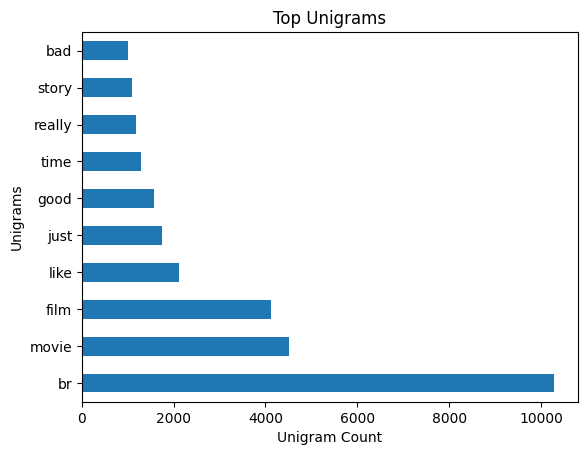

In [ ]:
import pandas as pd

dataframe_X_uni = pd.DataFrame(X_train_uni.toarray(), columns=X_train_uni_feat)
dataframe_X_uni.head()
dataframe_X_uni.sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Top Unigrams',
                                                  xlabel='Unigram Count', ylabel='Unigrams' );


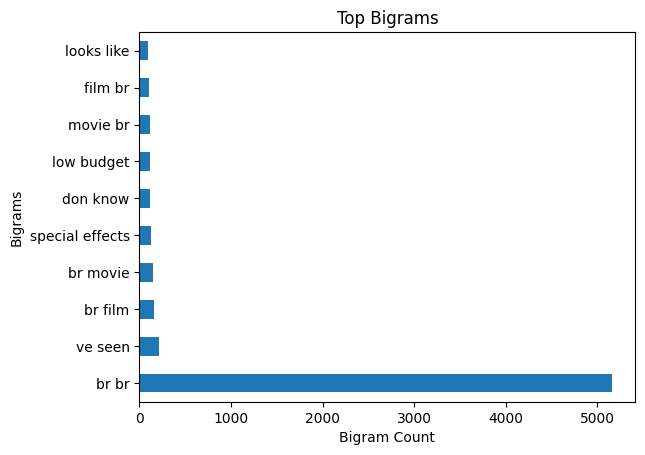

In [ ]:
dataframe_X_bi = pd.DataFrame(X_train_bi.toarray(), columns=X_train_bi_feat)
dataframe_X_bi.head()
dataframe_X_bi.sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Top Bigrams',
                                                  xlabel='Bigram Count', ylabel='Bigrams' );

In [ ]:
#As I can see the data is noised by <br> token from html. Let's ignore it for now, yet we definitely can
#   clean the data later on

**Simple one way forward pass**

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [11]:
#Let's define some simple 2 layer FCN first
class SimpleFCN(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2): #size are defined as parameters on calling the constructor
        super(SimpleFCN, self).__init__()# inherits parameters from parent class. Just use it always
        self.fc1 = torch.nn.Linear(input_size, hidden_size1)#first layer
        self.relu = torch.nn.ReLU()#nonlinearity
        self.fc2 = torch.nn.Linear(hidden_size1, hidden_size2)#second layer
        self.relu = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(hidden_size2,1)

    def forward(self, x):#just list the order of operations
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
#Let's list the parameters now and create an instance of SimpleFCN
#The input size would be amount of different tokens in our vocabulary
#Just using mf_option defined earlier would be wrong, since amount of features
#   might be larger than actual amount of tokens. I need to call tokenizer again
#   with arbitrary amount of features. Let's start with 1000 and see how it goes
#Output size should be just 1, since the result is a single value prediction "1" or "0"
mf_option = 1000
vectorizer_uni = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
X_train_uni = vectorizer_uni.fit_transform(X_train)
X_train_uni_feat = vectorizer_uni.get_feature_names_out(X_train)
A1 = len(X_train_uni_feat)

input_size = A1
hidden_size1 = 100
hidden_size2 = 10
model_uni = SimpleFCN(input_size, hidden_size1, hidden_size2)
learning_rate = 0.05
#Now I need to define loss function. Why not go with cross-entropy (Softmax Loss)
#Since we only have 2 classes, we use binary cross entropy (BCE)
#Also define optimizer here
#loss_function = torch.nn.BCELoss() -> RuntimeError: all elements of input should be between 0 and 1
#loss_function = torch.nn.BCEWithLogitsLoss -> RuntimeError: Boolean value of Tensor with more than one value is ambiguous
#   RESOLVED: The last layer was not defined proberly. It should be a sigmoid function instead of Linear
#   Layer I had on a previous run
loss_function = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_uni.parameters(), lr=learning_rate)

In [ ]:
X_train_uni

<45000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2090949 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_uni = X_train_uni.toarray()#that denses our matrix
X_train_uni = torch.Tensor(X_train_uni)
print(X_train_uni.shape)

torch.Size([45000, 1000])


In [ ]:
X_train_uni = X_train_uni.squeeze()
print(X_train_uni.shape)

torch.Size([45000, 1000])


In [ ]:
y_train = numpy.array(y_train)
y_train = y_train.flatten()
y_train = torch.Tensor(y_train)
print(y_train.shape)

torch.Size([45000])


In [ ]:
#One-run test loop:
# Forward pass
# Mistake 1:
#   outputs = model_uni(X_train) -> does not work, need to conver to Tensor first
# Mistake 2:
#   X_train = torch.Tensor(X_train_uni) -> matrix is sparse, need to dense it
outputs = model_uni(X_train_uni)

# Compute loss
# Mistake 3:
#   y_train is [45000]
#   x_train is not [45000], it is [45000,1]. Need to reshape. Add squeeze
#   to resolve it.
loss = loss_function(outputs.squeeze(), y_train)

# Zero gradients, backward pass, and optimization
optimizer.zero_grad()
loss.backward()
optimizer.step()


**Impementing the entire training loop + wandb logs.**

The initial data is not augmented in any way. Let's create a baseline with a simple FCN and some result

In [20]:
mf_option = 1000
vectorizer_uni = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
X_train_uni = vectorizer_uni.fit_transform(X_train)
X_train_uni_feat = vectorizer_uni.get_feature_names_out(X_train)

input_size = len(X_train_uni_feat)
hidden_size1 = 100
hidden_size2 = 50
model_uni = SimpleFCN(input_size, hidden_size1, hidden_size2)

learning_rate = 0.001
batch_size = 64
num_epochs = 5

# Changing the  data into Torch Tensors
X_train_uni = X_train_uni.toarray()#that denses our matrix
X_train_uni = torch.Tensor(X_train_uni)
y_train = numpy.array(y_train)
y_train = y_train.flatten()
y_train = torch.Tensor(y_train)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_uni = model_uni.to(device)
loss_function = torch.nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(model_uni.parameters(), lr=learning_rate)


In [ ]:
X_train_uni.shape

torch.Size([45000, 1000])

Single loop for check

In [21]:
#lets shuffle our data and load a batch. Numpy can use shuffle, torch analogue is perm
N = len(y_train)
indicies = numpy.random.permutation(N)
X_train_uni = X_train_uni[indicies]
y_train = y_train[indicies]
num_steps = N // batch_size

for i in range(num_steps):
  X_batch = X_train_uni[i*batch_size:(i+1)*batch_size]
  y_batch = y_train[i*batch_size:(i+1)*batch_size]
  X_batch.to(device)
  y_batch.to(device)
  #Forward pass
  outputs = model_uni(X_batch)
  loss = loss_function(outputs.squeeze(), y_batch)

  #Zero gradients and backwards pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [22]:
print(loss)

tensor(0.6918, grad_fn=<BinaryCrossEntropyBackward0>)


Actual training

In [ ]:
#run.finish()
mf_option = 10000
vectorizer_uni = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
X_train_uni = vectorizer_uni.fit_transform(X_train)
X_train_uni_feat = vectorizer_uni.get_feature_names_out(X_train)

input_size = len(X_train_uni_feat)
hidden_size1_pool = [250, 500, 600, 750]
hidden_size2_pool = [250, 350, 450, 500]
model_uni = SimpleFCN(input_size, hidden_size1, hidden_size2)

learning_rates = [0.1, 0.5, 0.05]
batch_size = 256
num_epochs = 30

# Changing the  data into Torch Tensors
X_train_uni = X_train_uni.toarray()#that denses our matrix
X_train_uni = torch.Tensor(X_train_uni)
y_train = numpy.array(y_train)
y_train = y_train.flatten()
y_train = torch.Tensor(y_train)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_uni = model_uni.to(device)
loss_function = torch.nn.BCELoss()
X_train_uni.to(device)
y_train.to(device)

#iterative runs over different hyperparameters
hyperparams = itertools.product(hidden_size1_pool, hidden_size2_pool, learning_rates)

for hidden_size1, hidden_size2, learning_rate in hyperparams:
    #initialaize the model
    model_uni = SimpleFCN(input_size, hidden_size1, hidden_size2)
    optimizer = torch.optim.Adam(model_uni.parameters(), lr=learning_rate)
    model_uni = model_uni.to(device)
    loss_function = torch.nn.BCELoss()
    wandb_configuration = {
    "hidden_layer_sizes": [hidden_size1, hidden_size2],
    "layers": '2+1',
    "activation": "ReLU",
    "Tokens" : "Unigrams",
    "Vocab" : mf_option,
    "LR" : learning_rate,
    "Batch_size" : batch_size,
    "Epochs" : num_epochs,
    "Loss" : loss.item(),
    "Optimizer" : "SGD",
    "Model Name" : "SimpleFCN"
    }

    global_steps = 0
    run = wandb.init(project="IMDB Sentiment Analysis", config = wandb_configuration)
    #iterations over epochs
    for epoch in range(num_epochs):
        N = len(y_train)
        indicies = numpy.random.permutation(N)
        X_train_uni = X_train_uni[indicies]
        y_train = y_train[indicies]
        num_steps = N // batch_size

        for i in range(num_steps):
            global_steps += 1

            X_batch = X_train_uni[i*batch_size:(i+1)*batch_size]
            y_batch = y_train[i*batch_size:(i+1)*batch_size]
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            #Forward pass
            outputs = model_uni(X_batch)
            loss = loss_function(outputs.squeeze(), y_batch)
            wandb.log({"train_loss": loss}, step=global_steps)
            #Zero gradients and backwards pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    run.finish()

train_loss,▄▃█▄▃▄▂▄▂▃▃▃▇▁▅▅▆█▄▃▅▄▆▃▃▄▄▃▂▅▃▄▃▁▅▁▃▆▄▆
train_loss,54.29688


train_loss,▅▆▅▄▅▅▃▅▄▂▄█▅▄▁▇▄▃▅▃▅▅▃▆▃▅▃▃▄█▂▆▅▇▄▄▄▆▅▄
train_loss,51.5625


train_loss,▇▃▅▃▃▃▄▇▅▃▂▃▃▆▆▃▄▂▆▅▄▆▆▃█▄▁▇▄▁▃▄▄▅▂▃▆▃▄▂
train_loss,49.60938


train_loss,▄▁▄▁▆▃▃▄▃▃▇▂▆▃▄▃▃▆▃▄▃█▄▄▆▃▂▆▂▅▁▆▁▄▄▄▄▅▄▆
train_loss,50.78125


train_loss,▄▆▃▄▅▆▁▅▄▆▇▃▃▂▇▇▂▃▃▄▃▂▆▅▆▃▅▄▆▅▆▄▃▆█▂▂▁▅▁
train_loss,53.51562


train_loss,▂▄▅▇▄█▄▃▁▇▆▇▃▄▂▃▅▇▃▄▄▄▇▃▅▁▆▄█▆▄▄▆▆█▆▅▃▆▆
train_loss,43.75


train_loss,▆▄▄▃▃▅▃▄▆▇▂▁▂▁█▃▆▃▁▅▆▃▆▃▂▄▂▄▅▆▃▃▂▄▂▄▂▁▆▄
train_loss,46.48438


train_loss,▅▅▅▅▇▅▆▂▃▃▇▅▇▄▃▅▅▇▅▃▅▄▅▇▂▃▅▄▄▅▁▆█▆▇▆▅▅▅█
train_loss,48.4375


train_loss,▆▄▇▃██▃▃▃▆▃▄▆▅▆▆▆▂▇▂▂▅▇▅▃▆▄▄▆▃▅▁▅▆▃▄▃▄▅▇
train_loss,46.48438


train_loss,▅▂▇▇▆▅▅▅▅▄▆█▄▃▆▃▃▅▄▅▇▆▂▅▂▁▆▅▆▂▆▃▁▆▆▇▄▅▄▄
train_loss,55.07812


train_loss,▆▆▅▅▆▇▄▅▇▅▇▁▄▄▄▅▄▆▅▅█▅▂▄▄▇▅▄▂▅▄▅▄▅▄█▆▅▁▄
train_loss,50.78125


train_loss,▆▂▃▄▄▄▃▅▄▄▇▃▄▁▅▂▂▁▄█▄▄▄▂▄▅▄█▃▃▇▂▃▂▇▃▄▅█▄
train_loss,46.875


train_loss,▃▆▇▅▄▇▅▃▅▃▃▆▅▃▃▂▅▄▇▆▅▆▄▅▆▃▅█▆▄▁▂▆▄▄▅▅▅▅▃
train_loss,43.75


train_loss,▄▂▂▄█▄▄▅▇▅▅▁▇▅▅▄▅▄▃▆▁▂▇▃▆▄▅▅▄▄▅▆▃▃▆▁▇▄▆▃
train_loss,54.29688


train_loss,▁▁▁▁▁█▇█▇▇█▇█▇▇█▇█▇█▆▇▇▆██▇▇▇█▇▇███▇████
train_loss,52.73438


train_loss,▅▆▂▅▅▇▅▄▄▄▅▅▄▃▇▂▆▅▅▅▆▄▄▅▇█▅▅▄▅▃▄▁▄▄▆▅▅▇▃
train_loss,51.17188


train_loss,▅▆▇▆█▃█▃▄▃▄▂█▁▅▃▄▃▃▇▆▇▃▂▃▅▅▁▅▅▆▄▆▆▄▅▅▅▃▅
train_loss,51.95312


train_loss,▂▃▂▆▆▅▁▄█▅▁▄▄▄▅▅▆▅▇▅▃▇▄▅▆▆▆▆█▄█▅▆▁▃▅▅▄▆▃
train_loss,46.09375


train_loss,▅▃▅▇▄▆▇▃▂▆▂▃▅▄▇▆▅▃▃▅▄▅██▃▇▄▇▆▂▅▄▁▄▆▅▂▆▆▆
train_loss,50.0


train_loss,█▅▃▃▅▂▅▅▄▂▁▄▁▄▃▄▃▃▄▅▂▄▃▃▂▂▅▅▃▂▃▇▄▄▄▆▄▅▄▇
train_loss,48.04688


train_loss,▄▅▁▁▅▅▅▄▆▄▂▁▄▃▁▆▅▃▄▃▆▂▃▆▄▅▅▃▅▅▃▂▄▃▃▄▄█▇▁
train_loss,51.17188


train_loss,▆▅▃▆▄▅▆▅▄▄▆▅▁▄▄▃▅▄▄▆▄█▇▇▅▆▅▃▆▄▆▃▆▂▆▂▆▇▇█
train_loss,46.875


train_loss,▁▃▃▂▃▄▇▅▂▆▃▅▄▆▄▆▃▂▅▃█▄▃█▃▄▄▆▃▃▆▇▃▆▄▄█▃▃▅
train_loss,51.17188


train_loss,▆▄▄▄▁▇▄▆▅▇▄▅▆▇▆▄▆▁▄▅▅▂▄▄▂▅▃▃▇▂▆▇▅▄▆▆█▆▅▇
train_loss,52.34375


train_loss,▃▆▃▄▂▅▅▄▇▆▄▂▄▂▄▃▃▁█▂▅▄▃▇▂▇▇▆▅▄▅▆▆▂▇▆▄▅▇▃
train_loss,49.21875


train_loss,▂▄▆▆▄▅▇▄▆▂▂▄▄▃▆▆▇▁▅▃█▃▆▇▄▄▃▄▆▅▅▆▄▅▆▄▂▇▅▇
train_loss,50.78125


train_loss,▁▁▁█▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,0.69223


train_loss,▅▂▃▄▅▃▆▄▁▇▃▄▂▂▄▂▅▃▁▄▅▂▅▄▃▅▄▃▅▁▄▃▄▃▄▄▃▄▆█
train_loss,51.5625


train_loss,▇▆▆▃▃▅█▅▄▇▇▃▆▅▁▄▅▃▄▆▇▆▅█▅█▄▆▄▃▄█▆▅▇▆▃▂▃▅
train_loss,46.875


train_loss,▃▁█▆█▆▂▆▄▃▅▄▃▆▅▅▅▂▄▅▆▅▅▅▅▄▂▅▃▇▂▆▆▁▅▅▄▄▂▄
train_loss,57.42188


train_loss,▃▄▅▇▅▄▆▅▄▇▂▄▅▆▃▇▆▇▇▅▃█▆▃▁▆▅▇▄▅▆▅▅▂▅▅▃▅▇▃
train_loss,55.46875


train_loss,▄▃▅▃▃▃▃▄▃▃▄▄▃▅▅▅▂▆▃▅▃▄▃▂▃▅▂▄▃▄▅▄▃▂▁▅█▂▄▅
train_loss,48.82812


train_loss,▇▃▆▅▁▇▅▆▃▆▆▆▆▄▆▇▄▄▄▂▅█▄▆▅▆▇▅▅▅▄▆▆▅▅▁▅▇▅▄
train_loss,54.29688


train_loss,▅▅▄▄▆█▄▅▄▆▅▄▆▅▅▆▆▄▆▆▆▄▅▅▁▆▆▅▄▅▅▅▅▂▅▆▄▄▇▄
train_loss,52.34375


train_loss,▆▃▁▂▁▃▁▅▂▃▄▃▁▂▃▄▂▃▇▃▄█▄▄▂▄▆▅▄▄▆▇▄▄▅▁▄▅▅█
train_loss,53.90625


train_loss,▅▃▄█▆▄▁▅▇▅▂▅▃▆▃▇▅▆█▃▂▄▄█▂▃▅▃▆▅█▆▆▄▃▆▅▆▄▅
train_loss,46.875


train_loss,▁▂▃▂▅▁▄▅▇▂▇▆▃▂▃▃▅▃▃▃▇▄▄▆▃▅▂▄▅▂█▃▅▅▃▅▄▁▆▆
train_loss,52.34375


train_loss,▇▅▅▅▅▆▆▃▃▄▄▆▄▆▆▁▄▂▆▆▃▅▄▅▇▄▄▅▂▅▅▅▆▅▄▅▄▆▇█
train_loss,47.65625


train_loss,▆▅▄▅▅█▇▅▃▄▅▅▁▆▃▅▁▄▂▆▄▄▅▃▅▃▃▅▄▆▅▆▃▆▆▄▄▅▆▆
train_loss,50.39062


train_loss,▁▃▅▆█▅▇▂▅▇▆▅▁▇▄▇▁▃▅▆▆███▅▅▄▅█▂▇▇▂▇▇▅▅▅▃▃
train_loss,53.125


train_loss,▂▅▄▃▄▇▄▃▃█▆▇▄▃▅▃▄▅▃▃▅▆▃▃▃▃▂▃▅▆▆▃▃▃▃▁▃▃▂▃
train_loss,47.65625


train_loss,▄▇▃▃█▆▆█▅▃▃▅▅▅▇▅█▆▇▁█▅▆▅▃▆▆▇▇▅▅▅▅▆▅▆▆▆▂▆
train_loss,46.09375


train_loss,▃▅▆▄▆▃▂▃▇▄▅▇▅▄▄▄▃▄▆▄▆█▃▄▇▄▆▅▁▆▃▁▆▅▄▄▂▄▅▄
train_loss,53.90625


train_loss,▄▄▂▃▂▅▅▃▄▅▇▅▁▃█▄▆▂▃▇▅▅▂▆▄▄▅▇▄▃▃▂▅▄▂▄█▅▁▁
train_loss,48.82812


train_loss,▄▃▄▇▅▅▆▂▅▆▅▅▃█▅▇▅▅█▅▇▆▃▅▄▅▂▃▄▅▆▇▁▆▄▆▅▇▆▅
train_loss,42.57812


train_loss,▆▂▅▁▆▃▂▄▅▆▃▇▅▃▅▄▄▃▆▃▅▅▂▂▁▂▅▄▂▂█▄▅▅▂▂▅▄▃▆
train_loss,55.07812


train_loss,▆▅▆▃▇▆▆▄▅▆▅▅▄▅▅▄▅▅█▃▅▇▆▄█▆▅▅▅▁▇▆▆▆▃▃▇▃▄█
train_loss,55.07812


train_loss,▃█▅▂▆▄▅▄▆▁▄▅▆▆▅▅▄▃▄▅▃▃▆▄▅▄▃▆▅▅▂▅▃▂▃▆▅▆▂▃
train_loss,40.625


Same runs but using Bigrams.


In [ ]:
#run.finish()
mf_option = 10000
vectorizer_bi = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
X_train_bi = vectorizer_bi.fit_transform(X_train)
X_train_bi_feat = vectorizer_bi.get_feature_names_out(X_train)

input_size = len(X_train_bi_feat)
hidden_size1_pool = [600, 750]
hidden_size2_pool = [450, 500]
model_bi = SimpleFCN(input_size, hidden_size1, hidden_size2)

learning_rates = [0.1, 0.5, 0.05]
batch_size = 256
num_epochs = 30

# Changing the  data into Torch Tensors
X_train_bi = X_train_bi.toarray()#that denses our matrix
X_train_bi = torch.Tensor(X_train_bi)
y_train = numpy.array(y_train)
y_train = y_train.flatten()
y_train = torch.Tensor(y_train)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_bi = model_bi.to(device)
loss_function = torch.nn.BCELoss()
X_train_bi.to(device)
y_train.to(device)

#iterative runs over different hyperparameters
hyperparams = itertools.product(hidden_size1_pool, hidden_size2_pool, learning_rates)

for hidden_size1, hidden_size2, learning_rate in hyperparams:
    #initialaize the model
    model_bi = SimpleFCN(input_size, hidden_size1, hidden_size2)
    optimizer = torch.optim.Adam(model_bi.parameters(), lr=learning_rate)
    model_bi = model_bi.to(device)
    loss_function = torch.nn.BCELoss()
    wandb_configuration = {
    "hidden_layer_sizes": [hidden_size1, hidden_size2],
    "layers": '2+1',
    "activation": "ReLU",
    "Tokens" : "Bigrams",
    "Vocab" : mf_option,
    "LR" : learning_rate,
    "Batch_size" : batch_size,
    "Epochs" : num_epochs,
    "Loss" : loss.item(),
    "Optimizer" : "Adam",
    "Model Name" : "SimpleFCN"
    }

    global_steps = 0
    run = wandb.init(project="IMDB Sentiment Analysis", config = wandb_configuration)
    #iterations over epochs
    for epoch in range(num_epochs):
        N = len(y_train)
        indicies = numpy.random.permutation(N)
        X_train_bi = X_train_bi[indicies]
        y_train = y_train[indicies]
        num_steps = N // batch_size

        for i in range(num_steps):
            global_steps += 1

            X_batch = X_train_bi[i*batch_size:(i+1)*batch_size]
            y_batch = y_train[i*batch_size:(i+1)*batch_size]
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            #Forward pass
            outputs = model_bi(X_batch)
            loss = loss_function(outputs.squeeze(), y_batch)
            if (global_steps % 100 == 0):
                wandb.log({"train_loss": loss}, step=global_steps)
            #Zero gradients and backwards pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    run.finish()

train_loss,▆▄▅▆▃▃▅▆▁▄▄▄▁▁▄▄▅▃▂▃▃▄▆▃▅▅▄▅▅▅▅▇▄▅▂▃█▃▃▂
train_loss,45.70312


train_loss,▃▇▄▇▁▂▃▄▄▅▅▆▇▅▅▄▆▄▆▆▄▆▃█▇▆▂▃▄▅▁█▆▅▇█▆▆▆▅
train_loss,50.0


train_loss,▄▆▄▁▂▃▆▃▅▄▆▅▅▃▄▄▄▂▂▇▂▄▃█▂▆▃▄▃▁▄▅▆▅▆▄▄▃▅▅
train_loss,51.5625


train_loss,▅▁▅▄▄▄▅▃▂▄▅▂▄█▅▃▅▄▃▅▅▇▃▂▄▇▆▁▆▃▆▃▃▅▅▆▆▅▂▄
train_loss,47.65625


train_loss,▄▂▂▄▃▄▄▂█▃▂▇▄▃▃▃▁▃▄▂▃▃▆▃▄▅▅▇▄▃▆▄▆▄▄▃▅▄▅▂
train_loss,45.3125


train_loss,▆▁▃▃▄▂▆▄▆▅▁▅▄▅▄▆▄▂▅▃▆▆▃▆▅▅▇▂▅█▃▆▅▂▂▅▆▆▄▇
train_loss,53.51562


train_loss,▅▃▅▅▄▆▇▂▃▃▅▄▃▇▂▅█▁▃▃▃▂▁▃▆▆▅▄▅▅▃▅▂▆▃▇▂▃▁▆
train_loss,53.125


train_loss,▃▃▄▅▅▂▅▄▃▅▃▅▃▂▅▄▃▄▅▇▅█▄▂▄▃▃▂▃▅▂▂▃▅▃▁▃▂▄▄
train_loss,49.60938


train_loss,▆▄▆▄▇▅▅▄▆▆▄▂▃▄▄▅▇▃▁█▂▆▃▆▆▃▇▅▅█▂▄▆▄▁▆▅▇▃▆
train_loss,52.73438


train_loss,▅▆▆▅▂▆▁▃▃▆▆▄▃▁▅▆▇▅▄▅▄▃▇█▅▆▂▇▆▃▄▄▇▇▄▃▇█▆█
train_loss,54.29688


train_loss,▅▂▂▅▄▆▅▃▁▃▂▄▂▂▅▃▃▃▄▅▃▂▂▃▄▃▆▆▆▆▃▃▄▂▂▃▂█▇▁
train_loss,44.14062


train_loss,▅▁▂▂▇▄▁▆▆▁▂▅▅▄▅▂▄▂▅█▂▅▁▄▄▅▃▃▄▂▄▅▂▅▇▃▅▅▆▃
train_loss,47.65625


In [ ]:
#Some heavy runs, since I got A100
mf_option = 28000
vectorizer_uni = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
X_train_uni = vectorizer_uni.fit_transform(X_train)
X_train_uni_feat = vectorizer_uni.get_feature_names_out(X_train)

input_size = len(X_train_uni_feat)
hidden_size1_pool = [1000, 1500, 2000, 2750]
hidden_size2_pool = [400, 600, 800, 1000]
model_uni = SimpleFCN(input_size, hidden_size1, hidden_size2)

learning_rates = [0.1, 0.5, 0.05]
batch_size = 512
num_epochs = 16

# Changing the  data into Torch Tensors
X_train_uni = X_train_uni.toarray()#that denses our matrix
X_train_uni = torch.Tensor(X_train_uni)
y_train = numpy.array(y_train)
y_train = y_train.flatten()
y_train = torch.Tensor(y_train)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_uni = model_uni.to(device)
loss_function = torch.nn.BCELoss()
X_train_uni.to(device)
y_train.to(device)

#iterative runs over different hyperparameters
hyperparams = itertools.product(hidden_size1_pool, hidden_size2_pool, learning_rates)

for hidden_size1, hidden_size2, learning_rate in hyperparams:
    #initialaize the model
    model_uni = SimpleFCN(input_size, hidden_size1, hidden_size2)
    optimizer = torch.optim.Adam(model_uni.parameters(), lr=learning_rate)
    model_uni = model_uni.to(device)
    loss_function = torch.nn.BCELoss()
    wandb_configuration = {
    "hidden_layer_sizes": [hidden_size1, hidden_size2],
    "layers": '2+1',
    "activation": "ReLU",
    "Tokens" : "Unigrams",
    "Vocab" : mf_option,
    "LR" : learning_rate,
    "Batch_size" : batch_size,
    "Epochs" : num_epochs,
    "Loss" : loss.item(),
    "Optimizer" : "SGD",
    "Model Name" : "SimpleFCN"
    }

    global_steps = 0
    run = wandb.init(project="IMDB Sentiment Analysis", config = wandb_configuration)
    #iterations over epochs
    for epoch in range(num_epochs):
        N = len(y_train)
        indicies = numpy.random.permutation(N)
        X_train_uni = X_train_uni[indicies]
        y_train = y_train[indicies]
        num_steps = N // batch_size

        for i in range(num_steps):
            global_steps += 1

            X_batch = X_train_uni[i*batch_size:(i+1)*batch_size]
            y_batch = y_train[i*batch_size:(i+1)*batch_size]
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            #Forward pass
            outputs = model_uni(X_batch)
            loss = loss_function(outputs.squeeze(), y_batch)
            if (global_steps % 100 == 0):wandb.log({"train_loss": loss}, step=global_steps)
            #Zero gradients and backwards pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    run.finish()

train_loss,▄▆▅▄▄▄▃█▆▇▁▅▆
train_loss,52.34375


train_loss,▁▅▆▇▅▃█▂▂▅▅▅▇
train_loss,51.17188


train_loss,▅▇▃▁▄▅▅▂█▃▁▅▂
train_loss,47.46094


train_loss,▄▆▁▄▂▅▆▄▅█▆▆▅
train_loss,50.78125


train_loss,▁▅▄▁▃▄▆▃█▅▃▄▂
train_loss,48.63281


train_loss,▆▁▅▅▂█▅▂▂▆▁▂▃
train_loss,49.21875


train_loss,▁▃▄▅▃▁▃▅▄█▄▂▄
train_loss,50.58594


train_loss,█▇▆▂▄▅▄▂▆▅▁▆▅
train_loss,49.80469


train_loss,▅▅▆▁█▅▅▅▄▄▆▂▄
train_loss,49.02344


train_loss,▃▅▃█▆█▅▅▄▅▃▄▁
train_loss,46.48438


train_loss,▂▇▆▃▆▅▁▆▄▃█▅▅
train_loss,51.36719


train_loss,▃▆█▄▁▇▄█▂▆▂▁▇
train_loss,51.17188


train_loss,▃▂▁▃▅▄▃█▃▄▅▄▂
train_loss,47.65625


train_loss,▂▄▄▃▆▇█▁▁▃▁▅▃
train_loss,50.58594


train_loss,▅▅█▁▇▅▇▃▁▂▄▁▄
train_loss,50.19531


train_loss,▆▇▅▄▇▂▅▅▅█▅▅▁
train_loss,44.14062


train_loss,▅▇▂▄█▇▅▂▁▅▇▇▁
train_loss,46.48438


train_loss,▇▂▆▂▇▁█▇▄▅█▂▅
train_loss,50.58594


train_loss,█▅▂▇▇▂█▆▇▃▁▂▂
train_loss,47.07031


train_loss,▅▅▅▆▅▅▆▆▄█▆▁▄
train_loss,48.04688


train_loss,▄▅▂██▁▃▁▅▂▃▁▅
train_loss,51.5625


train_loss,▆▁▁▁▃▂▅▃▂▂▂█▄
train_loss,49.80469


train_loss,▆▁▁▇▁▅▂██▃▅▆▃
train_loss,48.04688


train_loss,▆▆▄▃▆▁▆▇▆▅▆▇█
train_loss,52.53906


train_loss,▅▂▁▅▃▄█▄▇▇▂▂▅
train_loss,50.39062


train_loss,▂▄▄▇▃▆▂▄▅▇▁▇█
train_loss,53.51562


train_loss,▅▂▆▄▄▅▅▂▁█▃▂▅
train_loss,51.17188


train_loss,▆▄█▄▅▆▇▆▄▃▁▅▇
train_loss,51.95312


train_loss,▆▄▆▄▆█▁▇▅▂▂▆▅
train_loss,49.60938


train_loss,▃▁▃▁▄▃▃▃▄▄▄▄█
train_loss,54.49219


train_loss,▃█▄▂▇▁▃▇▅▆▅▅▃
train_loss,47.85156


train_loss,▂▅█▄▂▁▂▃▃▅▃▁▆
train_loss,51.95312


train_loss,▃▂▂▂▅▂▅▅█▁▄▄▅
train_loss,51.17188


train_loss,▁▅▄▆▅█▅▄▃▄▄▆▇
train_loss,51.75781


train_loss,▂▇▂▂▁▇▆▆█▁▆▄▆
train_loss,51.17188


train_loss,▅▄▅▆▁█▅▇▄▅▄▆▇
train_loss,51.17188


train_loss,▆▄▃▆▅▆▅▄▄▅█▅▁
train_loss,42.57812


train_loss,▇▄▇▅▄▄▄▃▁▄▄█▄
train_loss,49.41406


train_loss,▃▅▃▃▄▁▄▁▅▄█▂▁
train_loss,47.46094


train_loss,▄▅▅▆▅▁▂▅▅▃█▃▇
train_loss,53.71094


train_loss,▃▄▅▃▃██▅▁▅▄▅▅
train_loss,49.80469


train_loss,▃▂▅▂▅▃▁▄▅▆▂▄█
train_loss,53.90625


train_loss,▂▁▆▆▇▃▄█▆▅▄▂▇
train_loss,52.34375


train_loss,▆█▃▃▆▇▅▄▆▅▁▃▄
train_loss,49.02344


train_loss,▁▅▄▃▅█▇▃█▄▃▅▄
train_loss,49.41406


train_loss,█▅▄▁▁▃▆█▄▂▂▂▅
train_loss,51.5625


train_loss,▆▂▄▃█▅▂▁▄▃▆▂▆
train_loss,52.73438


train_loss,▅▁█▆▅▅█▇▆▃█▄▂
train_loss,46.48438


The loss was leaping around 0.5, so let's change the depth of the Network. If it does not help, the data would need some augmentation

In [31]:
class DeepFCN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, depth): #size are defined as parameters on calling the constructor
        super(DeepFCN, self).__init__()# inherits parameters from parent class. Just use it always
        layers = [torch.nn.Linear(input_size, hidden_size), torch.nn.ReLU(), torch.nn.BatchNorm1d(hidden_size)]
        for i in range(1, depth, 1):
            layers.append(torch.nn.Linear(hidden_size, hidden_size))
            layers.append(torch.nn.ReLU())
            layers.append(torch.nn.BatchNorm1d(hidden_size))

        layers.append(torch.nn.Linear(hidden_size,1))
        self.network = torch.nn.Sequential(*layers)

    def forward(self, x):#using Sequential
       x = torch.sigmoid(self.network(x))
       return x

In [ ]:
mf_option = 5000
vectorizer_uni = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
X_train_uni = vectorizer_uni.fit_transform(X_train)
X_train_uni_feat = vectorizer_uni.get_feature_names_out(X_train)

input_size = len(X_train_uni_feat)
hidden_size_pool = [500, 800]
num_layers = [4,5,6,7,10]
learning_rates = [0.5, 0.05]
batch_size = 512
num_epochs = 16

# Changing the  data into Torch Tensors
X_train_uni = X_train_uni.toarray()#that denses our matrix
X_train_uni = torch.Tensor(X_train_uni)
y_train = numpy.array(y_train)
y_train = y_train.flatten()
y_train = torch.Tensor(y_train)

loss_function = torch.nn.BCELoss()
X_train_uni.to(device)
y_train.to(device)

#iterative runs over different hyperparameters
hyperparams = itertools.product(hidden_size_pool, num_layers, learning_rates)

for hidden_size, N, learning_rate in hyperparams:
    #initialaize the model
    model_uni = DeepFCN(input_size, hidden_size, N)
    optimizer = torch.optim.Adam(model_uni.parameters(), lr=learning_rate)
    model_uni = model_uni.to(device)
    loss_function = torch.nn.BCELoss()
    wandb_configuration = {
    "hidden_layer_sizes": [hidden_size1, hidden_size2],
    "layers": N,
    "activation": "ReLU",
    "Tokens" : "Unigrams",
    "Vocab" : mf_option,
    "LR" : learning_rate,
    "Batch_size" : batch_size,
    "Epochs" : num_epochs,
    "Loss" : loss.item(),
    "Optimizer" : "Adam",
    "Model Name" : "DeepFCN"
    }

    global_steps = 0
    run = wandb.init(project="IMDB Sentiment Analysis", config = wandb_configuration)
    #iterations over epochs
    for epoch in range(num_epochs):
        N = len(y_train)
        indicies = numpy.random.permutation(N)
        X_train_uni = X_train_uni[indicies]
        y_train = y_train[indicies]
        num_steps = N // batch_size

        for i in range(num_steps):
            global_steps += 1

            X_batch = X_train_uni[i*batch_size:(i+1)*batch_size]
            y_batch = y_train[i*batch_size:(i+1)*batch_size]
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            #Forward pass
            outputs = model_uni(X_batch)
            loss = loss_function(outputs.squeeze(), y_batch)
            if (global_steps % 100 == 0):wandb.log({"train_loss": loss}, step=global_steps)
            #Zero gradients and backwards pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    run.finish()

train_loss,▇▆▄█▅▇▅▅▇▁▂▄▆
train_loss,49.80469


train_loss,███▇▆▄▂▁▁▂▁▁▁
train_loss,0.0636


train_loss,█▃▅▃▄▁▂▆▅▄▅▄▆
train_loss,51.75781


train_loss,████▇▅▂▁▁▁▁▁▁
train_loss,0.04205


train_loss,▄▅▄▃█▆█▇▄▃▅▂▁
train_loss,45.11719


train_loss,██▇▇▆▆▄▂▂▁▂▁▂
train_loss,0.13859


train_loss,▅▃█▆▄▃▅▁▃█▆▅▄
train_loss,49.02344


train_loss,███▇▆▄▂▂▁▁▁▁▁
train_loss,0.05556


train_loss,▄▅▇▇▄▂▁▂▃▅▃▃█
train_loss,51.95312


train_loss,▆█▆▆▆▅▃▂▂▁▁▁▁
train_loss,0.0787


train_loss,▂▄▅▃▅█▄▃▁▅▂▂▂
train_loss,48.4375


train_loss,███▇▆▅▂▂▁▁▁▁▁
train_loss,0.04732


train_loss,▇▅▆▆▇█▃█▁▇▆▆▅
train_loss,49.21875


train_loss,████▇▆▂▁▁▁▁▁▁
train_loss,0.06965


train_loss,▆▆▁▅▃█▂█▅▆▅▆▅
train_loss,49.80469


train_loss,████▇▆▃▂▂▁▁▁▁
train_loss,0.10636


train_loss,▂▂█▃▃▅▂▅▁▆▅▇▁
train_loss,48.24219


train_loss,████▇▇▄▃▃▃▂▂▁
train_loss,0.09257


train_loss,▅▁▆▃▅▆▃█▃▃▄▅▅
train_loss,50.78125


train_loss,███▇▇▇▅▃▃▃▁▁▁
train_loss,0.13223


I am incredibly confused at this point. Each second model has some learning curve. Clearly learning rate 0.5 was too high for model to converge. First thought was that all the previous runs failed not because of bad architecture, yet because of a badly chosen LR, yet after I check it I figure out that LR=0.05 was in both setups. At least I have a setup where loss actually decreases to some extent.

Let's try again with a different pool of learning rates. Also, it is time to implement test loss check (unseen data)


In [42]:
#Since I have already had all those copy/pasted code, let's aggregate it to simplify launch process
def RunTrainingSet(X_train, y_train, X_test, y_test,
                   mf_option = 5000,
                   gram_type = "uni",#we will use uni/bi/both
                   hidden_size_pool = [400, 800],
                   num_layers = [4,6,10],
                   learning_rates = [0.05, 0.001],
                   batch_size = 512,
                   num_epochs = 20

                    ):
    if gram_type == "uni":
        vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 1))
    elif gram_type == "bi":
        vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(2, 2))
    elif gram_type == "both":
        vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features = mf_option, ngram_range=(1, 2))
    else:
        return 'Wrong gram type'

    X_train = vectorizer.fit_transform(X_train)
    X_train_feat = vectorizer.get_feature_names_out(X_train)
    input_size = len(X_train_feat)

    # Changing the  data into Torch Tensors
    X_train = X_train.toarray()#that denses our matrix
    X_train = torch.Tensor(X_train)
    y_train = numpy.array(y_train)
    y_train = y_train.flatten()
    y_train = torch.Tensor(y_train)

    loss_function = torch.nn.BCELoss()
    X_train.to(device)
    y_train.to(device)

    #iterative runs over different hyperparameters
    hyperparams = itertools.product(hidden_size_pool, num_layers, learning_rates)

    for hidden_size, N, learning_rate in hyperparams:
        #initialaize the model
        model = DeepFCN(input_size, hidden_size, N)
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        model = model.to(device)
        loss_function = torch.nn.BCELoss()
        wandb_configuration = {
        "hidden_layer_sizes": [hidden_size1, hidden_size2],
        "layers": N,
        "activation": "ReLU",
        "Tokens" : "{gram_type}grams",
        "Vocab" : mf_option,
        "LR" : learning_rate,
        "Batch_size" : batch_size,
        "Epochs" : num_epochs,
        "Optimizer" : "Adam",
        "Model Name" : "DeepFCN"
        }

        global_steps = 0
        run = wandb.init(project="IMDB Sentiment Analysis", config = wandb_configuration)
        #iterations over epochs
        for epoch in range(num_epochs):
            N = len(y_train)
            indicies = numpy.random.permutation(N)
            X_train = X_train[indicies]
            y_train = y_train[indicies]
            num_steps = N // batch_size

            for i in range(num_steps):
                global_steps += 1
                model.train()
                X_batch = X_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                #Forward pass
                outputs = model(X_batch)
                loss = loss_function(outputs.squeeze(), y_batch)
                if (global_steps % 100 == 0):wandb.log({"train_loss": loss}, step=global_steps)
                #Zero gradients and backwards pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            #let's evaluate on test data
            model.eval()
            K = len(y_test)
            total_correct = 0
            total_loss = 0
            num_steps = K // batch_size
            with torch.no_grad():
                for i in range(num_steps):
                    X_batch = X_train[i*batch_size:(i+1)*batch_size]
                    y_batch = y_train[i*batch_size:(i+1)*batch_size]
                    X_batch = X_batch.to(device)
                    y_batch = y_batch.to(device)
                    #Forward pass
                    outputs = model(X_batch)
                    loss = loss_function(outputs.squeeze(), y_batch)
                    predict = torch.max(outputs, 1)
                    total_correct += len(predict)
                    total_loss += loss
                #average over
                loss = total_loss / num_steps
                accuracy = total_correct / num_steps

                wandb.log({"test_loss": loss}, step=global_steps)
                wandb.log({"test_accuracy": accuracy}, step=global_steps)




        run.finish()

In [43]:
RunTrainingSet(X_train, y_train, X_test, y_test,
               hidden_size_pool = [600],
               num_layers = [5],
               learning_rates = [0.05],
               num_epochs = 10)

test_accuracy,▁▁▁▁▁▁▁▁▁▁
test_loss,███▇▅▃▂▁▁▁
train_loss,██▇▆▅▃▁▁
test_accuracy,2.0
test_loss,0.06302
train_loss,0.0576
